In [71]:
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_distribution
from qiskit.quantum_info import Statevector, Operator
from qiskit.quantum_info.operators import Pauli
import pylatexenc

In [72]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [3]:
u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([(1+2.0j)/3,-2/3])
w = Statevector([1/3,2/3])


In [7]:

u.is_valid()

True

In [4]:
print(u)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


{'0': 553, '1': 447}

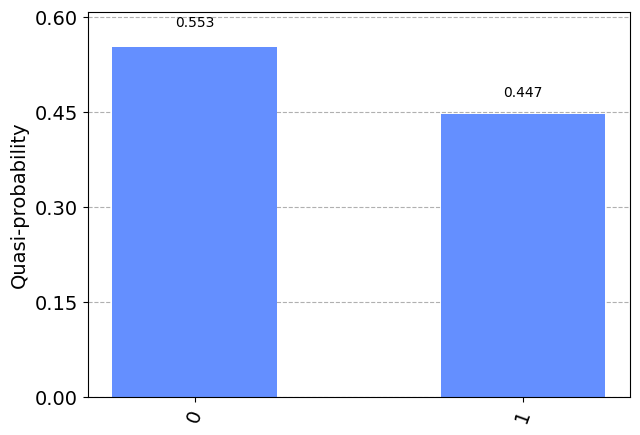

In [9]:
statistics = v.sample_counts(1000)
display(statistics)
plot_distribution(statistics)

In [73]:
circuit = QuantumCircuit(2, 2)

circuit.x(1)
circuit.h(range(2))
circuit.cx(0, 1)
circuit.h(range(1))
circuit.measure(range(1),range(1));

In [74]:
print(circuit)

     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 2/═════════════════════╩═
                          0 


In [52]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')

In [56]:
from qiskit.visualization import plot_state_city
from qiskit import execute

In [65]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

In [66]:
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(circuit, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [68]:
counts = result_sim.get_counts(circuit)
print(counts)

{'01': 1024}


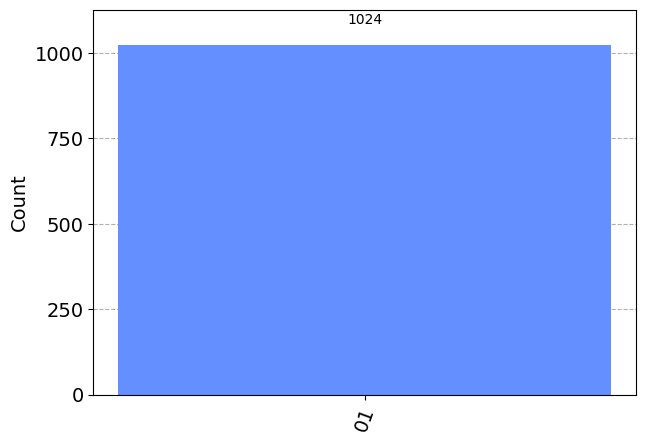

In [69]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)